In [ ]:
"""
Purpose: To check the errors on the validation test set
to get ideas on how to make validation score go up

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd
import datajoint_utils as du

INFO - 2021-04-06 05:22:47,318 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-06 05:22:47,320 - settings - Setting database.user to celiib
INFO - 2021-04-06 05:22:47,321 - settings - Setting database.password to newceliipass
INFO - 2021-04-06 05:22:47,370 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-06 05:22:47,372 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-06 05:22:47,387 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-06 05:22:47,802 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-06 05:22:47,841 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-06 05:22:47,843 - settings - Setting database.user to celiib
INFO - 2021-04-06 05:22:47,844 - settings - Setting database.password to newceliipass
INFO - 2021-04-06 05:22:47,845 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-06 05:22:47,846 - settings - Setting database.user to celiib
INFO - 2021-04-06 05:22:47,847 - settings - Setting database.password to newceliipass
INFO - 2021-04-06 05:22:47,848 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-06 05:22:48,303 - settings - Setting enable_python_native_blobs to True


# Computing the validation statistics (to pick the ones to look at)

In [4]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 39
n_errored_syn_ids_presyn = 482
n_valid_syn_ids_postsyn = 3898
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 86
n_errored_syn_ids_presyn = 621
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

WARNING - 2021-04-06 05:23:57,325 - font_manager - findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
WARNING - 2021-04-06 05:23:57,338 - font_manager - findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
WARNING - 2021-04-06 05:23:57,343 - font_manager - findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Segment_id = 864691136175008774


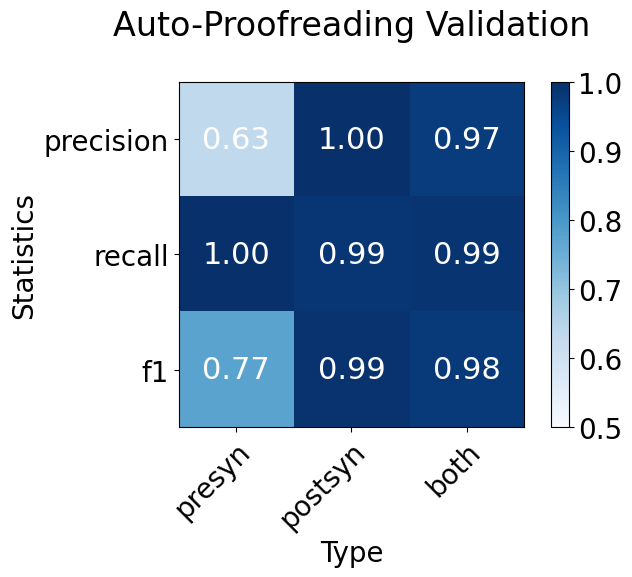

In [5]:
curr_idx = 32
segment_id = segment_ids[curr_idx]
print(f"Segment_id = {segment_id}")
curr_validation_df = validation_dfs[curr_idx]
vu.synapse_validation_df_to_score_plot(curr_validation_df)

# Picking the neuron to visualize

In [6]:
du.plot_proofread_validation_neuron(
    segment_id = segment_id,
    validation_df=curr_validation_df,
    verbose = True,
    synapse_type = "presyn",
    synapse_scatter_size = 0.05,
)

Working on Neuron: 864691136175008774


Synapse Category Results, synapse_type = presyn
# of TP = 105
# of TN = 103
# of FP = 61
# of FN = 0
No axon skeleton attribute stored in database table


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


TP:yellow
TN:aqua
FP:black
FN:orange


# Checking the neuron proofreading

In [7]:
segment_id = vu.validation_df_to_old_segment_id(curr_validation_df)
segment_id

864691136175008774

In [8]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1


In [9]:
neuron_obj = neuron_objs[0]
neuron_obj.segment_id

864691136175008774

In [10]:
clu.axon_classification(neuron_obj,
                       plot_axons=True)


Part 1: Axon like branchese 
{'L0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]), 'L1': array([ 2,  4, 12]), 'L6': array([3])}
Limb L0 soma angle: 163.9 
Limb L1 soma angle: 18.39 
Limb L2 soma angle: 150.48 
Limb L3 soma angle: 138.17 
Limb L4 soma angle: 89.08 
Limb L5 soma angle: 40.53 
Limb L6 soma angle: 145.53 

Part 2: possible_axon_limbs = [0, 2, 3, 4, 6]

Phase 2: Working on Limb L0
nodes_to_eliminate = []

Phase 2: Working on Limb L2
nodes_to_eliminate = [4]

Phase 2: Working on Limb L3
nodes_to_eliminate = [4]

Phase 2: Working on Limb L4
nodes_to_eliminate = []

Phase 2: Working on Limb L6
nodes_to_eliminate = [0 2 3]

----Working on Limb L0-----
No nodes were eliminated so don't need to add back any candidates

----Working on Limb L2-----
N

base_final_widths = [286.08045254 239.83117497]
overall_ais_width = 211.43902534388522
ais_width = 262.955813753802
Adding the following branches as true axons: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62.]
curr_soma_angle = 163.9
max_axon_angle = 175.39361506786526
Changing to a better axon candidate


 --- Working on limb 2, candidate # 0
0 out of 3 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 


 --- Working on limb 2, candidate # 1
0 out of 1 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 


 --- Working on limb 3, candidate # 0
0 out of 1 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 


 --- Working on limb 3, candidate # 1
0 out of 3 branches are ax

({'L0': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
         26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
         39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
         52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62.])},
 {'L1': array([4]), 'L6': array([3])})

In [11]:
nviz.plot_axon(neuron_obj,skeleton = True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Filtering Dendrite on Axon then recomputing High Fidelity Axon

In [12]:
plot_limb_branch_filter_with_disconnect_effect = False
verbose = False
verbose_outline = True

pre_filters = pru.get_exc_filters_high_fidelity_axon_preprocessing()
o_neuron_pre, filtering_info_pre = pru.apply_proofreading_filters_to_neuron(input_neuron = neuron_obj,
                                        filter_list = pre_filters,
                    plot_limb_branch_filter_with_disconnect_effect=plot_limb_branch_filter_with_disconnect_effect,
                                        plot_limb_branch_filter_away=False,
                                        plot_final_neuron=False,

                                        return_error_info=True,
                                         verbose=verbose,
                                        verbose_outline=verbose_outline)


--- Working on filter 0:
function = dendrite_on_axon_merges
function __name__ = filter_away_dendrite_on_axon_merges
function arguments = {'use_pre_existing_axon_labels': True}





 ---- Total time for applying filter: 0.4126777648925781 -----


In [13]:
# Getting the high fidelity axon
neuron_obj_high_fid_axon = pru.refine_axon_for_high_fidelity_skeleton(o_neuron_pre)

Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_node_to_axon_starting_branch = None


  0%|          | 0/1 [00:00<?, ?it/s]

root_curr = [1244453.   639584.   918857.6]
Time for preparing soma vertices and root: 0.003618478775024414
invalidation_d = 2000
cc_vertex_thresh = 10


  0%|          | 0/127411 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.43s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 5.546816110610962
connecting at the root
branches_touching_root = [138]
combining close nodes
combine_threshold = 1300
length of Graph = 37504
After combining close endpoints max(kept_branches_idx) = 138, len(kept_branches_idx) = 134
empty_indices % = 0.0
 conflict_indices % = 0.010037700468399758


  0%|          | 0/64 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/134 [00:00<?, ?it/s]

Decomposing first pass: 17.338001012802124
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.91278076171875e-05
Total time for MAP sublimb processing 5.245208740234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.00024628639221191406
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.16279292106628418
sbv[0].reshape(-1,3) = [[1244453.   639584.   918857.6]]
closest_sk_pt_coord BEFORE = [1243887.22682918  639810.32696763  919335.60011188]
current_skeleton.shape = (710, 2, 3)
node_for_stitch = 0: [1243887.22682918  639810.32696763  919335.60011188]
node_for_stitch AFTER = 0: [1243887.22682918  639810.32696763  919335.60011188]
possible_node_loc = [  0 508]
possible_node_loc AFTER = [  0 508]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status fo

  0%|          | 0/7 [00:00<?, ?it/s]

Removed 7 skeletal branches


  0%|          | 0/134 [00:00<?, ?it/s]

253868 253869
For marked faces: None
empty_indices % = 0.00024028140497658242
 conflict_indices % = 0.0


  0%|          | 0/1 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/121 [00:00<?, ?it/s]

Limb Correspondence before stitching = 121
Limb Correspondence AFTER stitching = 121
Upstream node was None so don't have to adjust
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f6fdf8cb240>]}
Assigning the old width calculation because no valid new widths


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1243887.22682918  639810.32696763  919335.60011188]---------
Starting_edge inside branches_to_conept = [[1243887.22682918  639810.32696763  919335.60011188]
 [1247339.58562196  706579.08494556  916647.93847151]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [54]
printing out current edge:
[[1243887.22682918  639810.32696763  919335.60011188]
 [1247339.58562196  706579.08494556  916647.93847151]]
edge_endpoints_to_process was empty so exiting loop after 121 iterations
starting_node in concept map (that should match the starting edge) = 59
Total time for bra

In [14]:
nviz.plot_axon(neuron_obj_high_fid_axon)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Computing the Boutons of the Axon

In [51]:
import axon_utils as au
neuron_obj_with_boutons = au.calculate_boutons(#parameters for run
neuron_obj = neuron_obj_high_fid_axon,
plot_axon_branches_to_check = False,
plot_boutons = False,
verbose = False,
)


  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Assigning the old width calculation because no valid new widths


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

# Computing the Webbing

In [168]:
neuron_obj_with_web = au.calculate_axon_webbing(neuron_obj_with_boutons,
                      idx_to_plot = [0],
                plot_intersection_mesh = True,
                plot_intersection_mesh_without_boutons = True,
                plot_split = True,
                plot_split_closest_mesh = True,
                plot_segmentation_before_web = True,
                plot_web = True,
                        plot_webbing_on_neuron = False,
                    verbose = False,
                        )

Upstream Node (red), Downstream Nodes (aqua)


Upstream Node (red), Downstream Nodes (aqua)


Mesh Split with significance_threshold = 20


  0%|          | 0/14 [00:00<?, ?it/s]

Before volume filter
Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(258, 3), faces.shape=(500, 3))> (0.413061)
Mesh 1: <trimesh.Trimesh(vertices.shape=(52, 3), faces.shape=(97, 3))> (0.107141)
Mesh 2: <trimesh.Trimesh(vertices.shape=(46, 3), faces.shape=(86, 3))> (0.2554515)
Mesh 3: <trimesh.Trimesh(vertices.shape=(44, 3), faces.shape=(80, 3))> (0.7938000000000001)
Mesh 4: <trimesh.Trimesh(vertices.shape=(24, 3), faces.shape=(41, 3))> (0.582937)
Mesh 5: <trimesh.Trimesh(vertices.shape=(22, 3), faces.shape=(38, 3))> (0.12392600000000001)
Mesh 6: <trimesh.Trimesh(vertices.shape=(12, 3), faces.shape=(15, 3))> (0.147838)
Mesh 7: <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(13, 3))> (0.177145)
Mesh 8: <trimesh.Trimesh(vertices.shape=(10, 3), faces.shape=(13, 3))> (0.0421436)
Mesh 9: <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(12, 3))> (0.11487800000000001)
Mesh 10: <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(10, 3))> (0.13875)
Mesh 11: <trimesh.Trimesh

After volume filter
Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(52, 3), faces.shape=(97, 3))> (0.107141)
Mesh 1: <trimesh.Trimesh(vertices.shape=(46, 3), faces.shape=(86, 3))> (0.2554515)
Mesh 2: <trimesh.Trimesh(vertices.shape=(44, 3), faces.shape=(80, 3))> (0.7938000000000001)
Mesh 3: <trimesh.Trimesh(vertices.shape=(24, 3), faces.shape=(41, 3))> (0.582937)
Mesh 4: <trimesh.Trimesh(vertices.shape=(22, 3), faces.shape=(38, 3))> (0.12392600000000001)


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

In [169]:
nviz.plot_boutons(neuron_obj_with_web,
                  mesh_whole_neuron_alpha = 0.2,
                 plot_web=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Need way of finding the intersection and webbings of incorrect to correct branching

In [178]:
"""
Purpose: The only thing to go off of is the boundaries from 

valid to invalid branch
valid to valid branch

because from invalid to invalid is that it coulb be a valid or invalid split

Pseudocode: 
1) Label ranches as valid, invalid or unknown based on if valid/invalid
synapse is mapped to it
2) collet the invalid connected compoents of branches shortest path to the 
soma and then know the valid, invalid path 

may need to hand inspect and mark the incorrect boundary

Things to do: 
1) Get the synapses and their labels
2) Map the synapse labels to the branches (may have to resolve multi-labels)
to get the valid and invalid branches of the axon
3) Collect all invalid axon branches into connected components

For each invalid connected component:
    4) Find the shortest path from connected components back to starting node
    5) Save off 2nd node on path

"""
n_obj = neuron_obj_with_web
verbose = True

plot_valid_limb_branch_dict = True
plot_invalid_limb_branch_dict = True
plot_invalid_conn_comp = True
plot_invalid_conn_comp_idx = None
plot_invalid_conn_comp_path = False

In [125]:
syn_centers_dict = vu.validation_df_to_synapse_centers_dict(
    curr_validation_df[curr_validation_df["synapse_type"] == 'presyn']
)
valid_synapses_coords = np.vstack([syn_centers_dict["TP"],syn_centers_dict["FN"]])
invalid_synapses_coords = np.vstack([syn_centers_dict["TN"],syn_centers_dict["FP"]])

if verbose:
    print(f"# valid_synapses_coords = {len(valid_synapses_coords)}, # invalid_synapses_coords = {len(invalid_synapses_coords)}")

# valid_synapses_coords = 105, # invalid_synapses_coords = 164


In [126]:
axon_limb_name = n_obj.axon_limb_name
filter_to_axon = True
apply_removal_propogation = True
ax_limb_obj = n_obj[axon_limb_name]

invalid_limb_branch, invalid_distances = nru.coordinates_to_closest_limb_branch(n_obj,
                                  invalid_synapses_coords,
                                      return_distances_to_limb_branch=True)
invalid_limb_branch_dict = nru.limb_branch_list_to_limb_branch_dict(invalid_limb_branch,
                                    verbose=False)


if apply_removal_propogation:
    invalid_limb_branch_dict= nru.limb_branch_removed_after_limb_branch_removal(n_obj,
                                         invalid_limb_branch_dict)
if filter_to_axon:
    invalid_limb_branch_dict = nru.filter_limb_branch_dict_by_limb(invalid_limb_branch_dict,
                                                                limb_names=axon_limb_name)

valid_limb_branch, valid_distances = nru.coordinates_to_closest_limb_branch(n_obj,
                                  valid_synapses_coords,
                                      return_distances_to_limb_branch=True)
valid_limb_branch_dict = nru.limb_branch_list_to_limb_branch_dict(valid_limb_branch,
                                    verbose=False)
if filter_to_axon:
    valid_limb_branch_dict = nru.filter_limb_branch_dict_by_limb(valid_limb_branch_dict,
                                                                limb_names=axon_limb_name)
    



if verbose:
    print(f"valid_limb_branch_dict = {valid_limb_branch_dict}")
    print(f"invalid_limb_branch_dict = {invalid_limb_branch_dict}")
    print(f"Overlap = {nru.limb_branch_intersection([invalid_limb_branch_dict,valid_limb_branch_dict])}")
    
invalid_axon_branches = invalid_limb_branch_dict[axon_limb_name]
valid_axon_branches = np.setdiff1d(ax_limb_obj.get_branch_names(),invalid_axon_branches)
if verbose:
    print(f"invalid_axon_branches = {invalid_axon_branches}")
    print(f"valid_axon_branches = {valid_axon_branches}")

valid_limb_branch_dict = {'L0': array([  5,   2,   8,  14,  15,   9,  17,  18,  22,  34,  33,  41,  36,
        55,  56,  40,  57,  59,  31,  77,  71,  78,  75,  81,  82, 105])}
invalid_limb_branch_dict = {'L0': [102, 103, 106, 107, 98, 47, 89, 90, 95, 86, 114, 115, 24, 25, 117, 118, 119, 99, 100, 10, 20, 6, 11, 13, 12, 16, 21, 19, 27, 29, 26, 23, 28, 35, 42, 50, 52, 83, 85, 88, 91, 84, 87, 97, 92, 110, 1, 3, 4, 53, 51, 58, 104, 101, 94, 93, 96, 109, 111, 108, 112, 116, 113, 120]}
Overlap = {}
invalid_axon_branches = [102, 103, 106, 107, 98, 47, 89, 90, 95, 86, 114, 115, 24, 25, 117, 118, 119, 99, 100, 10, 20, 6, 11, 13, 12, 16, 21, 19, 27, 29, 26, 23, 28, 35, 42, 50, 52, 83, 85, 88, 91, 84, 87, 97, 92, 110, 1, 3, 4, 53, 51, 58, 104, 101, 94, 93, 96, 109, 111, 108, 112, 116, 113, 120]
valid_axon_branches = [  0   2   5   7   8   9  14  15  17  18  22  30  31  32  33  34  36  37
  38  39  40  41  43  44  45  46  48  49  54  55  56  57  59  60  61  62
  63  64  65  66  67  68  69  70  71

In [ ]:
if plot_valid_limb_branch_dict:
    nviz.plot_limb_branch_dict(n_obj,
                               valid_limb_branch_dict,
                              scatters=[valid_synapses_coords],
                               color = "red",
                             scatter_size=0.1,
                             scatters_colors="aqua")

In [ ]:
if plot_invalid_limb_branch_dict:
    nviz.plot_limb_branch_dict(n_obj,
                           invalid_limb_branch_dict,
                          scatters=[invalid_synapses_coords],
                         scatter_size=0.1,
                         scatters_colors="black")

#[k for k in dir(nru) if "limb_branch" in k]

In [23]:
"""
3) Collect all invalid axon branches into connected components
4) Find the shortest path from connected components back to starting node
5) Save off the 2nd node in path as boundary node

"""
import networkx as nx
import matplotlib.pyplot as plt
G_ax = n_obj[axon_limb_name].concept_network_directional

G_ax_invalid = G_ax.subgraph(invalid_axon_branches)


invalid_conn_comp = [list(k) for k in nx.connected_components(nx.Graph(G_ax_invalid))]

if verbose:
    print(f"Original Axon Graph length = {len(G_ax.nodes())}")
    print(f"Invalid Axon Subgraph = {len(G_ax_invalid.nodes())}")
    print(f"# conn comp Axon Subgraph = {len(invalid_conn_comp)}")

Original Axon Graph length = 121
Invalid Axon Subgraph = 64
# conn comp Axon Subgraph = 8


In [24]:
plot_invalid_conn_comp_idx = [3]

if plot_invalid_conn_comp_idx is None:
    plot_invalid_conn_comp_idx = np.arange(len(invalid_conn_comp))

if plot_invalid_conn_comp:
    for curr_idx in range(len(invalid_conn_comp)):
        if curr_idx in plot_invalid_conn_comp_idx:
            curr_error_conn_comp = invalid_conn_comp[curr_idx]
            print(f"\ncurr_error_conn_comp {curr_idx}: = {curr_error_conn_comp}")
            nviz.visualize_neuron_path(n_obj,
                                       visualize_type = ["skeleton"],
                                       limb_idx=axon_limb_name,
                                       path = curr_error_conn_comp
                                )


curr_error_conn_comp 3: = [83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]

 Working on visualization type: skeleton


In [25]:
"""
For each invalid connected component:
    4) Find the shortest path from connected components back to starting node
    5) Save off 2nd node on path

"""
import networkx_utils as xu


boundary_branches = []
plot_invalid_conn_comp_path = False
plot_boundary_branches = True

G_ax_undirected = nx.Graph(G_ax)
curr_start_branch = n_obj[axon_limb_name].current_starting_node
for j,cc in enumerate(invalid_conn_comp):
    cc_path,st_node,end_node = xu.shortest_path_between_two_sets_of_nodes(G_ax_undirected,
                                                        cc,
                                                        [curr_start_branch])
    
        
    if plot_invalid_conn_comp_path: 
        nviz.visualize_neuron_path(n_obj,
                                       visualize_type = ["mesh","skeleton"],
                                       limb_idx=axon_limb_name,
                                       path = cc_path
                                )
    curr_boundary_node = cc_path[1]
    boundary_branches.append(curr_boundary_node)
        
    if verbose:
        print(f"\nFor invalid conn comp {j}, path to starting node ({curr_start_branch}): {cc_path}")
        print(f"Boundary node = {curr_boundary_node}")
        
boundary_branches = np.unique(boundary_branches)

if plot_boundary_branches:
    print(f"{len(boundary_branches)} boundary_branches : {boundary_branches}")
    nviz.visualize_neuron(n_obj,
                        limb_branch_dict = {axon_limb_name:boundary_branches},
                          mesh_color="red",
                          mesh_boutons=True,
                          mesh_web=True,
                          mesh_whole_neuron=True,
                          
                                )


For invalid conn comp 0, path to starting node (59): [53, 56, 55, 72, 67, 59]
Boundary node = 56

For invalid conn comp 1, path to starting node (59): [58, 56, 55, 72, 67, 59]
Boundary node = 56

For invalid conn comp 2, path to starting node (59): [1, 2, 15, 38, 63, 66, 59]
Boundary node = 2

For invalid conn comp 3, path to starting node (59): [104, 81, 76, 73, 72, 67, 59]
Boundary node = 81

For invalid conn comp 4, path to starting node (59): [51, 40, 39, 64, 60, 69, 66, 59]
Boundary node = 40

For invalid conn comp 5, path to starting node (59): [50, 48, 49, 40, 39, 64, 60, 69, 66, 59]
Boundary node = 48

For invalid conn comp 6, path to starting node (59): [35, 43, 48, 49, 40, 39, 64, 60, 69, 66, 59]
Boundary node = 43

For invalid conn comp 7, path to starting node (59): [42, 43, 48, 49, 40, 39, 64, 60, 69, 66, 59]
Boundary node = 43
6 boundary_branches : [ 2 40 43 48 56 81]

 Working on visualization type: mesh

 Working on visualization type: skeleton


# visualize each of the boundary branches and see if the webbing can tell us anything

In [26]:
boundary_idx = 2
nviz.plot_web_intersection(n_obj,
                          limb_idx=nru.limb_idx(axon_limb_name),
                         branch_idx=boundary_branches[boundary_idx],
                          parent_color="black",
                          downstream_color = "red",
                          web_color = "aqua",
                      mesh_alpha = 1,
                          print_web_info = True,
                         plot_boutons = True,
                          plot_whole_limb = True,
                           whole_limb_alpha=0.2,
                          whole_limb_color = "green",
                    mesh_boutons_color = "aqua",
                          verbose=True)


Plotting web intersection for limb_idx 0, branch_idx 43
Web Mesh = <trimesh.Trimesh(vertices.shape=(24, 3), faces.shape=(39, 3))>, web_cdf = 0.156437 
web_bbox_rations = [1.4012294994752001, 1.281883823508806, 1.0931017879917684], web_volume_ratio = 1.9817747395575478
Parent_width (no_bouton_median)= 113.53477364348096
Parent_width (no_spine_median_mesh_center) = 113.53477364348096

Downstream branch 35 width (no_spine_median_mesh_center) = 60.46133101205814
Downstream branch 35 width (no_bouton_median)= 60.46133101205814
child_angle = 35.37

Downstream branch 42 width (no_spine_median_mesh_center) = 51.41102967402979
Downstream branch 42 width (no_bouton_median)= 51.41102967402979
child_angle = 17.32

sibling_angles = {42: 52.34}



In [27]:
nviz.plot_objects(n_obj[axon_limb_name][boundary_branches[boundary_idx]].web)

# collecting the webbings for valid boundaries

In [28]:
G_valid = G_ax.subgraph(valid_axon_branches)
valid_parent_nodes = [k for k in valid_axon_branches if
                             len(xu.downstream_nodes(G_valid,k))>=2]
if verbose:
    print(f"Parent Nodes with at least 2 valid downstream nodes: {valid_parent_nodes}")

Parent Nodes with at least 2 valid downstream nodes: [9, 15, 31, 34, 38, 39, 46, 48, 49, 54, 55, 59, 60, 61, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 76, 78]


In [30]:
axon_limb_obj = n_obj[axon_limb_name]

In [34]:
valid_parent_nodes_thin = [v for v in valid_parent_nodes if
                          axon_limb_obj[v].width_new["no_bouton_median"] < 60]
valid_parent_nodes_thin

[15, 31, 34, 38, 55, 63, 68]

In [50]:
[tu.mesh_size(k,
            size_type="ray_trace_percentile") for k in n_obj[axon_limb_name][branch_idx].boutons]

[209.9679964371419]

In [47]:
[tu.mesh_size(k,
            size_type="ray_trace_percentile") for k in n_obj[axon_limb_name][15].boutons]

[211.65795347778595,
 579.4369186652187,
 324.8126525625711,
 547.1708676749229,
 229.51173329621844,
 273.41485228303685,
 328.418867334718,
 277.7564035107946,
 251.01322857564298,
 289.6207632341576,
 289.8598412809529,
 270.2019687114988]

In [44]:
import trimesh_utils as tu
[k for k in dir(tu) if "ray" in k]

['ray_pyembree', 'ray_trace_distance']

211.62323715849342

In [49]:
valid_idx = 3
branch_idx = valid_parent_nodes_thin[valid_idx]
#branch_idx = 15
nviz.plot_web_intersection(n_obj,
                          limb_idx=nru.limb_idx(axon_limb_name),
                         branch_idx=branch_idx,
                          parent_color="black",
                          downstream_color = "red",
                          web_color = "aqua",
                      mesh_alpha = 1,
                          print_web_info = True,
                         plot_boutons = True,
                          plot_whole_limb = True,
                           whole_limb_alpha=0.2,
                          whole_limb_color = "green",
                    mesh_boutons_color = "aqua",
                          verbose=True,
                          scatters=[valid_synapses_coords],
                     scatter_size=0.1,
                     scatters_colors="red")


Plotting web intersection for limb_idx 0, branch_idx 38
Web Mesh = <trimesh.Trimesh(vertices.shape=(111, 3), faces.shape=(206, 3))>, web_cdf = 0.25173100000000004 
web_bbox_rations = [1.9845574256367373, 1.3849251397806055, 1.4329709011933478], web_volume_ratio = 2.0577682530094146

Parent Node 38, n_boutons = 1
Parent_width (no_bouton_median)= 49.007038121031364
Parent_width (no_spine_median_mesh_center) = 54.40558704818267

Downstream Branch 15, n_boutons = 12

Downstream branch 15 width (no_spine_median_mesh_center) = 62.40832704301233
Downstream branch 15 width (no_bouton_median)= 52.08391943566838
child_angle = 16.42

Downstream Branch 37, n_boutons = 0

Downstream branch 37 width (no_spine_median_mesh_center) = 44.51540956998426
Downstream branch 37 width (no_bouton_median)= 44.51540956998426
child_angle = 96.36

sibling_angles = {37: 105.21}



In [38]:
nviz.plot_objects(n_obj[axon_limb_name][branch_idx].web)

# would like to pick out the axon branches that are thin with thick boutons

In [170]:
import neuron_searching as ns
branch_obj = neuron_obj_with_boutons[axon_limb_name][5]
print(f"{branch_obj.width_new}")
b_meshes = nru.boutons_above_thresholds(branch_obj,
                             faces=80,
                            ray_trace_percentile=400)

nviz.plot_objects(branch_obj.mesh,
                 meshes=b_meshes,
                 meshes_colors="red")

{'median_mesh_center': 56.89047598394667, 'no_spine_median_mesh_center': 56.89047598394667, 'no_bouton_median': 53.28575622316487}


In [171]:
# search the neurons for thin axons with thick boutons
bouton_limb_branch_dict = ns.query_neuron(n_obj,
               functions_list=["n_boutons_above_thresholds","width_new"],
               query="(n_boutons_above_thresholds>1) & (width_new < 65)",
               function_kwargs=dict(width_new_name='no_bouton_median',
                                   faces=60,
                                   ray_trace_percentile=400),
               return_dataframe=False)
bouton_limb_branch_dict

{'L0': array([  2,   5,  12,  15,  18,  22,  29,  33,  34,  36,  40,  41,  78,
         81,  83,  85,  97, 105, 108, 112])}

In [128]:
nviz.visualize_neuron(n_obj,
                      visualize_type=["mesh"],
                      limb_branch_dict=bouton_limb_branch_dict,
                     mesh_color="red",
                     mesh_boutons=True,
                     mesh_whole_neuron=True)


 Working on visualization type: mesh


# visualize the webbing in the thin axon parts

In [129]:
#no_bouton_median
types_of_widths = [52,57]

In [194]:
thin_axon_bouton_branches = bouton_limb_branch_dict[axon_limb_name]
thin_branching = [k for k in thin_axon_bouton_branches if len(xu.downstream_nodes(n_obj[axon_limb_name].concept_network_directional,k)) >=2]
curr_idx = 9
branch_idx = thin_branching[curr_idx]
nviz.plot_web_intersection(n_obj,
                          limb_idx=nru.limb_idx(axon_limb_name),
                         branch_idx=branch_idx,
                          parent_color="black",
                          downstream_color = "red",
                          web_color = "aqua",
                      mesh_alpha = 1,
                          print_web_info = True,
                         plot_boutons = True,
                          plot_whole_limb = False,
                           whole_limb_alpha=0.2,
                          whole_limb_color = "green",
                    mesh_boutons_color = "aqua",
                          verbose=True,
#                           scatters=[valid_synapses_coords],
#                      scatter_size=0.1,
#                      scatters_colors="red"
                          )

IndexError: list index out of range

In [193]:
curr_web = neuron_obj_with_web[axon_limb_name][branch_idx].web
nviz.plot_objects(curr_web)

In [180]:
# import axon_utils as au
# au.calculate_axon_webbing_on_branch(n_obj,
#                                    axon_limb_name,
#                                    2,
#                             allow_plotting = True,
#                             plot_intersection_mesh = True,
#                             plot_intersection_mesh_without_boutons = True,
#                             split_significance_threshold = 20,
#                             plot_split = True,
#                             plot_split_closest_mesh = True,
#                             plot_segmentation_before_web = True,
#                             plot_web = True,
#                           verbose = True,)

Upstream Node (red), Downstream Nodes (aqua)


Upstream Node (red), Downstream Nodes (aqua)


joining_endpoint_1 = [1135542.1499611  701347.6538359  975404.1021107]
coordinates_of_intersection = [array([1135055.70656978,  701115.88613709,  975575.88239262]), array([1135851.68531797,  701662.8927696 ,  975170.81816612]), array([1136029.37529759,  701372.55786141,  975509.15760697])]
Mesh Split with significance_threshold = 20


  0%|          | 0/13 [00:00<?, ?it/s]

Before volume filter
Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(214, 3), faces.shape=(415, 3))> (0.493695)
Mesh 1: <trimesh.Trimesh(vertices.shape=(187, 3), faces.shape=(355, 3))> (0.190356)
Mesh 2: <trimesh.Trimesh(vertices.shape=(82, 3), faces.shape=(154, 3))> (0.319745)
Mesh 3: <trimesh.Trimesh(vertices.shape=(55, 3), faces.shape=(102, 3))> (0.1572965)
Mesh 4: <trimesh.Trimesh(vertices.shape=(28, 3), faces.shape=(51, 3))> (0.115328)
Mesh 5: <trimesh.Trimesh(vertices.shape=(19, 3), faces.shape=(29, 3))> (0.378686)
Mesh 6: <trimesh.Trimesh(vertices.shape=(16, 3), faces.shape=(23, 3))> (0.259744)
Mesh 7: <trimesh.Trimesh(vertices.shape=(10, 3), faces.shape=(13, 3))> (0.0563972)
Mesh 8: <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(12, 3))> (0.0433097)
Mesh 9: <trimesh.Trimesh(vertices.shape=(10, 3), faces.shape=(11, 3))> (0.0493241)
Mesh 10: <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(10, 3))> (0.1707105)
Mesh 11: <trimesh.Trimesh(vertices.shape=(7, 3),

Number of segmentation before volume filter = 13
Number of segmentation AFTER volume filter = 5
After volume filter
Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(214, 3), faces.shape=(415, 3))> (0.493695)
Mesh 1: <trimesh.Trimesh(vertices.shape=(82, 3), faces.shape=(154, 3))> (0.319745)
Mesh 2: <trimesh.Trimesh(vertices.shape=(55, 3), faces.shape=(102, 3))> (0.1572965)
Mesh 3: <trimesh.Trimesh(vertices.shape=(28, 3), faces.shape=(51, 3))> (0.115328)
Mesh 4: <trimesh.Trimesh(vertices.shape=(16, 3), faces.shape=(23, 3))> (0.259744)


web_mesh = <trimesh.Trimesh(vertices.shape=(214, 3), faces.shape=(415, 3))>, web_cdf = 0.493695


(<trimesh.Trimesh(vertices.shape=(214, 3), faces.shape=(415, 3))>, 0.493695)